# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?



In [158]:
# Import the necessary libraries
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [159]:
# Import the categorical df

categorical_df = pd.read_csv('/Users/leozinho.air/Desktop/ironhack_da/class_11/lab-cleaning-categorical-data/categorical.csv')

categorical_df = categorical_df.drop('Unnamed: 0', axis=1) 

for column in categorical_df.columns:
    unique_values = categorical_df[column].unique()
    print(f"Unique values for {column}:", unique_values)

Unique values for customer: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Unique values for state: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values for response: [0 1]
Unique values for coverage: ['Basic' 'Extended' 'Premium']
Unique values for education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values for effective_to_date: ['2011-02-24' '2011-01-31' '2011-02-19' '2011-01-20' '2011-02-03'
 '2011-01-25' '2011-01-18' '2011-01-26' '2011-02-17' '2011-02-21'
 '2011-01-06' '2011-02-06' '2011-01-10' '2011-01-17' '2011-01-05'
 '2011-02-27' '2011-01-14' '2011-01-21' '2011-02-05' '2011-01-29'
 '2011-02-28' '2011-02-12' '2011-02-02' '2011-02-07' '2011-01-22'
 '2011-02-13' '2011-01-15' '2011-01-08' '2011-01-11' '2011-01-28'
 '2011-02-08' '2011-02-23' '2011-01-02' '2011-02-16' '2011-01-27'
 '2011-01-23' '2011-01-09' '2011-02-11' '2011-02-04' '2011-02-01'
 '2011-02-15' '2011-02-26' '2011-01-16' '2011-01-01' '2011-02-10'
 '2011-0

## Plots for the categorical variables 

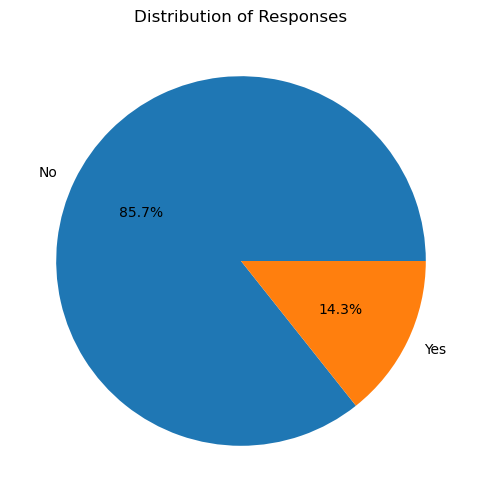

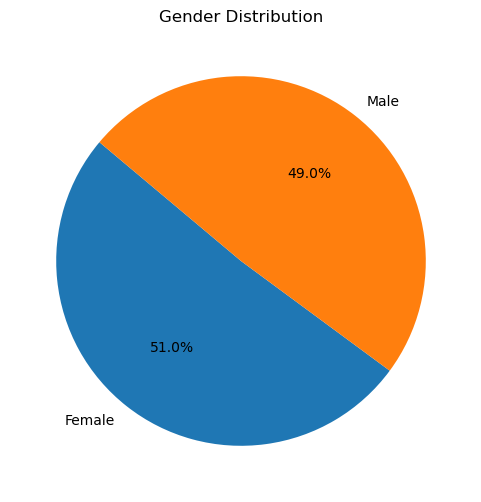

In [160]:
# Pie charts

# 1. Response

response_counts = categorical_df['response'].value_counts()

labels = ['No', 'Yes']

plt.figure(figsize=(6, 6))
plt.pie(response_counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Responses')
plt.show()

# 2. Gender

# Since i OneHot encoded the feature 'gender' in a previous lab, befor plotting i revert it to categorical

gender_reverted = categorical_df[['gender_f', 'gender_m']].idxmax(axis=1).str.replace('gender_', '')

categorical_df['gender_reverted'] = gender_reverted

gender_counts = categorical_df['gender_reverted'].value_counts()

labels = ['Female','Male']

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()




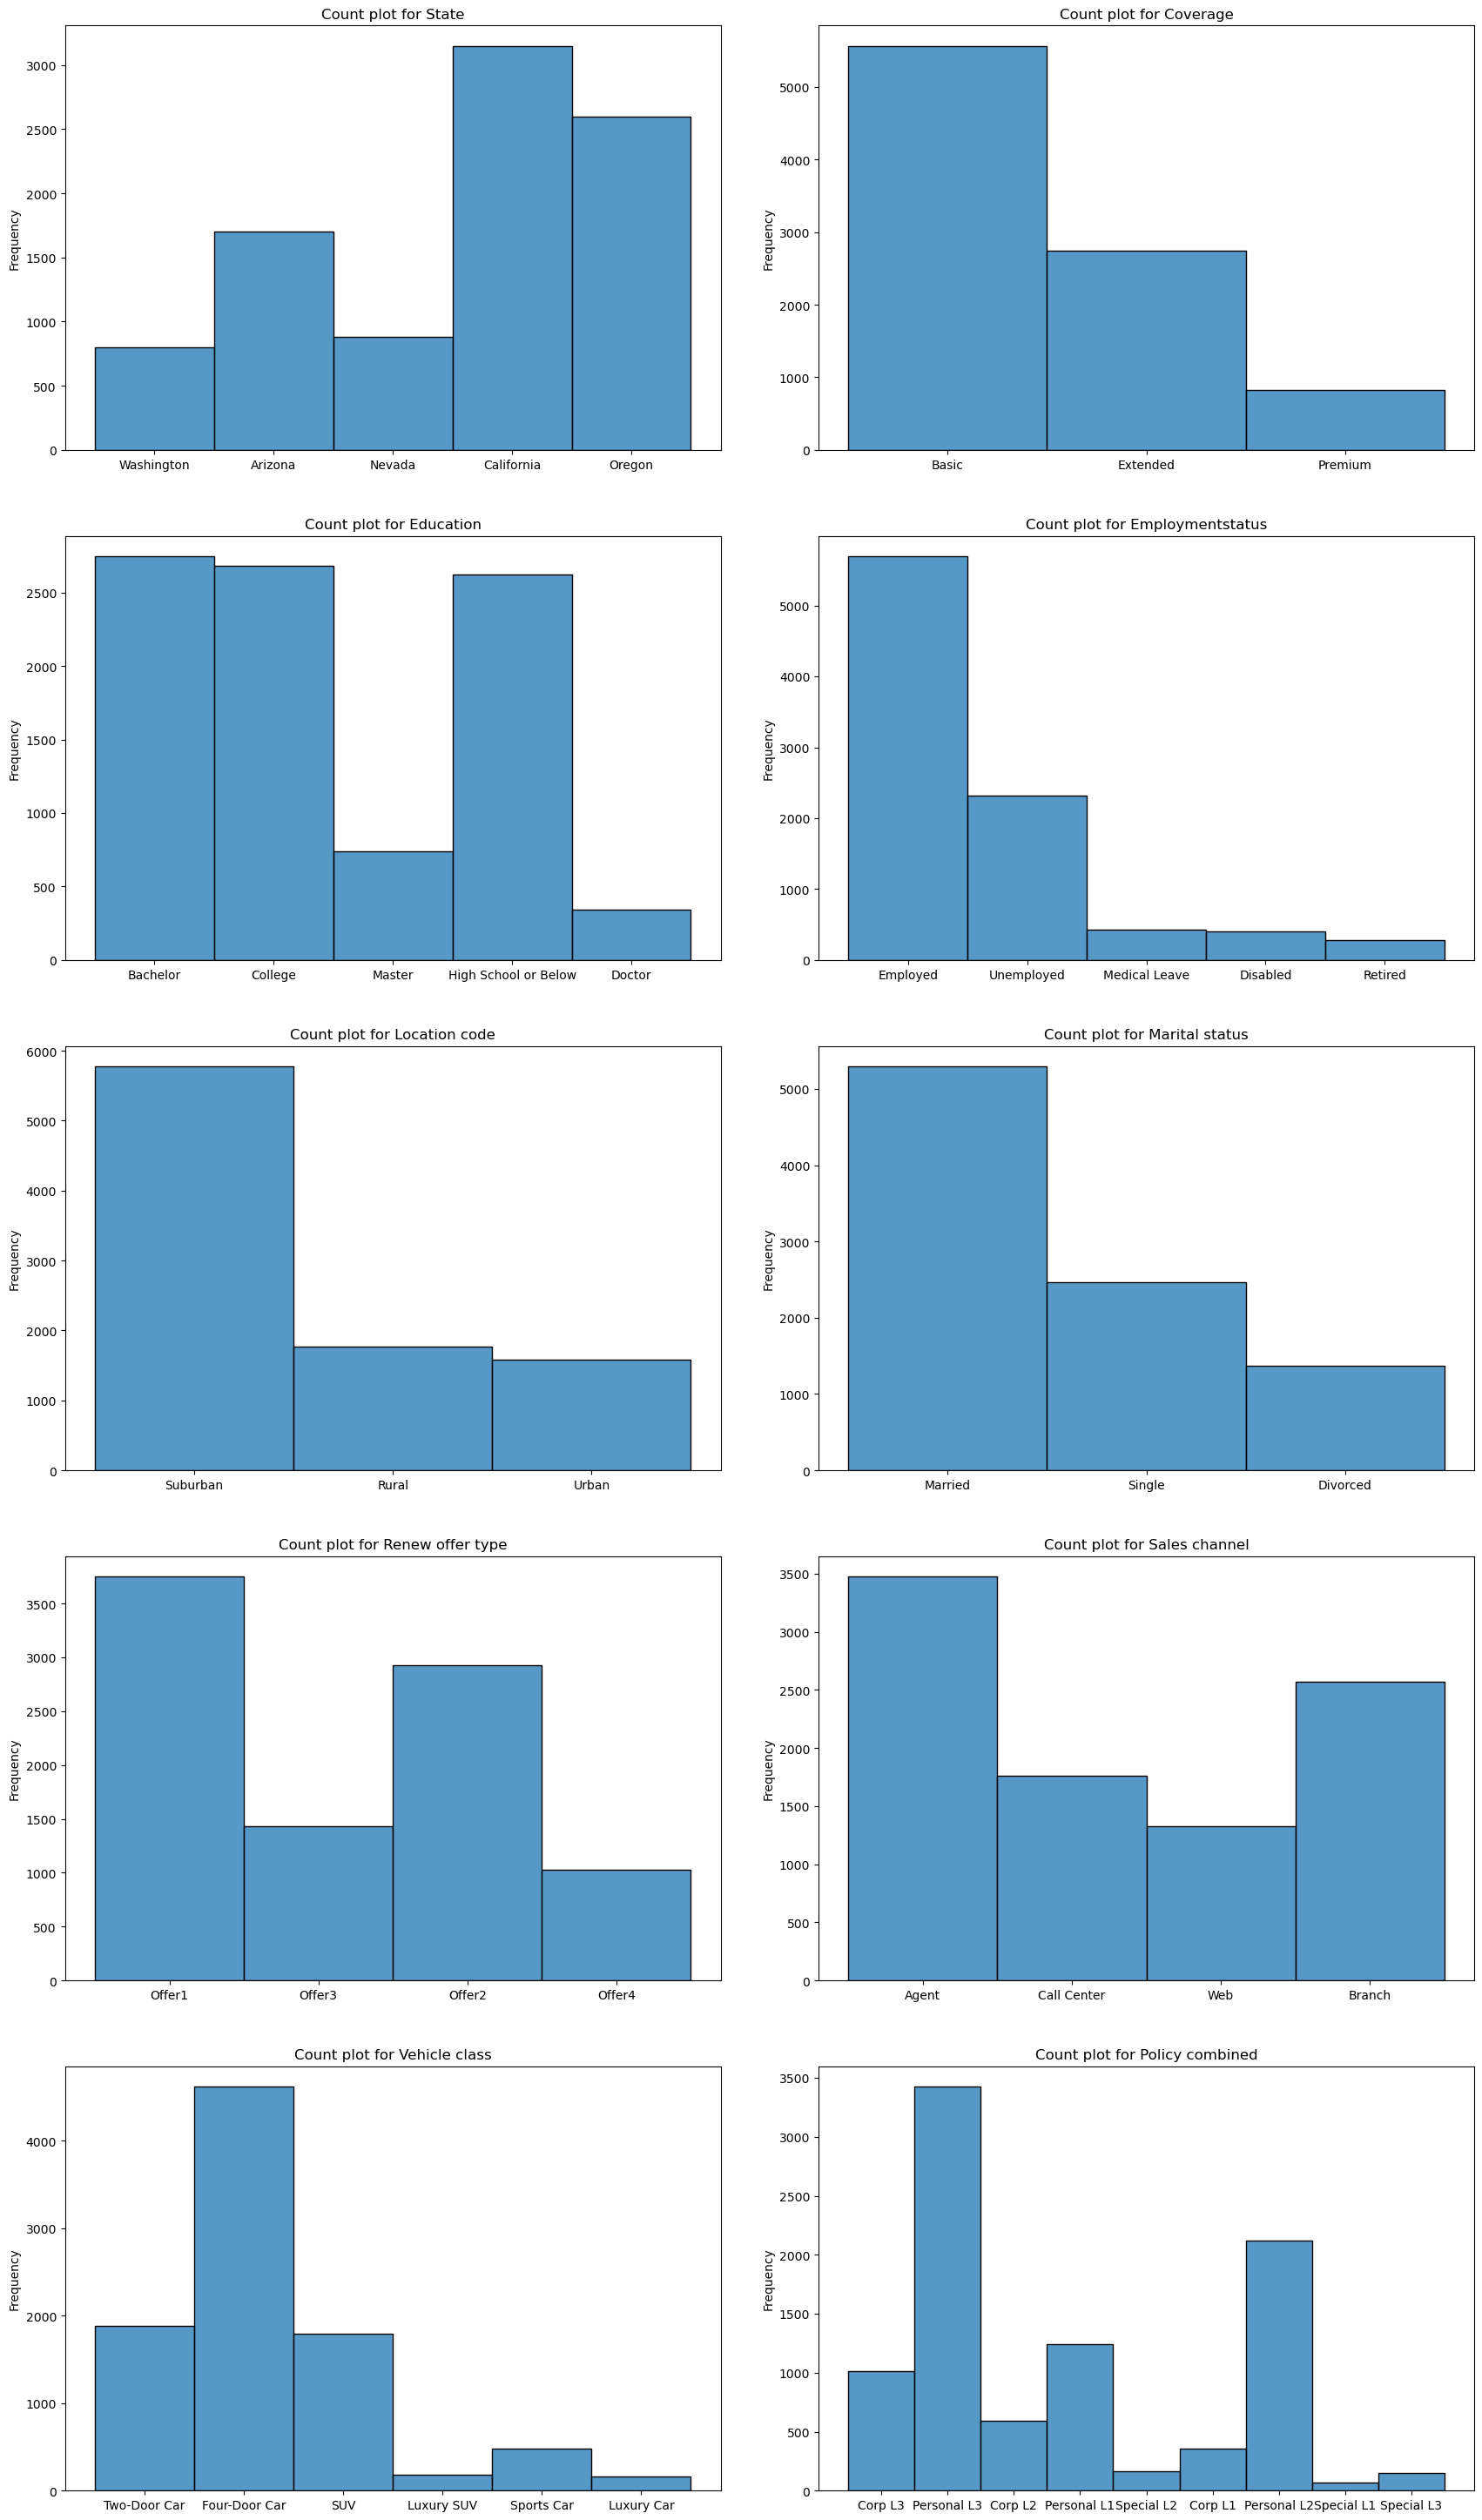

In [161]:
# Count Plots

# Choose the columns to Plot with a countplot

count_col = ['state','coverage','education','employmentstatus','location_code','marital_status','renew_offer_type',
            'sales_channel','vehicle_class','policy_combined']

# Map policy_combined to better visualization
policy_labels = {
    'Corporate Auto_L3': 'Corp L3',
    'Personal Auto_L3': 'Personal L3',
    'Corporate Auto_L2': 'Corp L2',
    'Personal Auto_L1': 'Personal L1',
    'Special Auto_L2': 'Special L2',
    'Corporate Auto_L1': 'Corp L1',
    'Personal Auto_L2': 'Personal L2',
    'Special Auto_L1': 'Special L1',
    'Special Auto_L3': 'Special L3'
}

# Map the categories using the labels
categorical_df['policy_combined'] = categorical_df['policy_combined'].map(policy_labels)

# Display Count Plot

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 30))
fig.tight_layout(pad=5.0)

for i, column in enumerate(count_col):
    row = i // 2
    col = i % 2
    sns.histplot(categorical_df[column], stat='count', ax=axes[row, col])
    axes[row, col].set_title(f'Count plot for {column.capitalize().replace("_"," ")}')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xlabel(None)

plt.show()

In [162]:
# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

print('I do not observe any redundancy in the plots, possibly due to the alterations made in the previous lab.')






I do not observe any redundancy in the plots, possibly due to the alterations made in the previous lab.


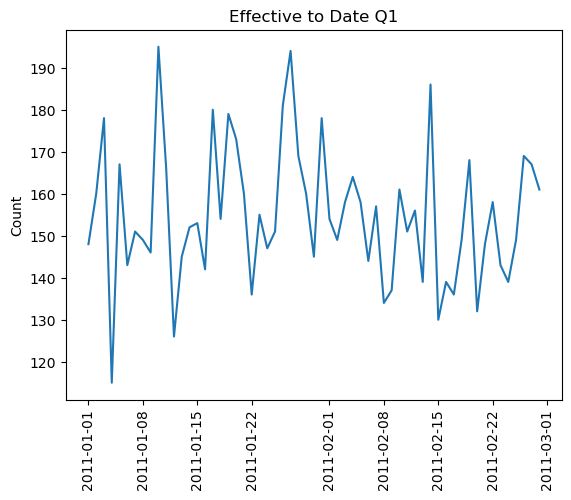

In [163]:
# Plot Effective to Date

categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date']) # Encode to datetime


time_series = pd.DataFrame(categorical_df['effective_to_date'].value_counts().reset_index())
time_series.columns = ['date', 'count']

time_series = time_series.sort_values('date', ascending=True)
plt.plot(time_series['date'], time_series['count'])
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.title('Effective to Date Q1')
plt.show()